In [3]:
!pip install tensorflow==1.15.5
!pip install TFANN

     |████████████████████████████████| 110.5MB 37kB/s 
     |████████████████████████████████| 3.8MB 54.3MB/s 
     |████████████████████████████████| 512kB 48.2MB/s 
     |████████████████████████████████| 20.1MB 1.2MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=a13d31d53179dcc5ab44cfa0fbabfe890882c99be121452377079bb0f4469ad7
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninsta

  Created wheel for TFANN: filename=TFANN-1.0.1-cp37-none-any.whl size=7539 sha256=b0965e19605f9aa272729e7b33fbc360b6c0856395f20aa17f3b328131868e67
  Stored in directory: /root/.cache/pip/wheels/3b/38/aa/a57c9b8bdeccf63d4a14ced9ab09a1b4cc4cb3b48fadecf906
Successfully built TFANN


Data Scientist 
<li>Business Intelligence => Outcome: Executive Report (Salary 25k-60k Thailand)</li>
<li>Data Engineer => Implement Infra, Policy for shifting business to the world, for example, FinTech (Bank) (Salary 30k-150k)</li>
<li>Data Scientist => Analyze math models (very high salary; 330k, less position, probably need some post-doc)</li>

<li>2010 -> AMAZON EC2</li>
<li>2013 -> DeepLearning</li>
<li>2016 -> Google: Tensorflow</li>

<li>Keras</li>
<li>High-level API</li>
<li>Libraries (Numpy,Plt,...)</li>
<li>Low-level API</li>
<li>CPU, GPU, TPU (Used to minimize vector operation)</li>
https://playground.tensorflow.org/

Epoch = Standard unit of time sharing together around the world (maybe in the midterm?)

In [1]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
from TFANN import ANNR # keras api for implement layers
import numpy as np
from sklearn.preprocessing import scale
import datetime

In [9]:
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2021,3,9)
advanc = pdr.get_data_yahoo('ADVANC.BK', start, end)

# advanc['High'].plot(figsize=(15,7))
# print(advanc)

highestDailyPrice = advanc['High'].to_list()
print(highestDailyPrice)
dates = advanc.index.to_list()
# print(dates)
print(type(dates[0])) # <class 'pandas._libs.tslibs.timestamps.Timestamp'>

# We want the datetime, not the timestamp format
dates = pd.to_datetime(dates).values.astype(np.int64)
#dates # Long number outputs are the Epoch
# Epoch = Standard unit of time sharing together around the world
# Starting from around 1970s and start counting until nowadays
# 1 January 1970 00.00.00
# Epoch per day = 24 * 3.6M Epoch

# Normalizing graph, same graph but different scale (y-axis = S.D.)
dates = scale(dates).reshape(-1,1)
highestDailyPrice = scale(highestDailyPrice).reshape(-1,1)
print(highestDailyPrice)

# Not Pandas dataframe anymore, use plt to plot the graph
# plt.figure(figsize=(15,7))
# plt.plot(highestDailyPrice)

# Compent for ANN
input = 1 # date (size=1)
output = 1 # price (size=1)
hidden = 50 # first hidden layer node
hidden2 = 200
# layer = [node_number, activation_function] # we want 3 layers for now
layer = [('F', hidden), ('AF', 'relu'),
         ('F', hidden), ('AF', 'relu'),
         ('F', hidden), ('AF', 'relu'),
         ('F', output)]

denseLayer = [('F', hidden2), ('AF', 'relu'),
         ('F', hidden2), ('AF', 'relu'),
         ('F', hidden2), ('AF', 'relu'),
         ('F', hidden2), ('AF', 'relu'),
         ('F', output)]

predictModel = ANNR([input],
                    layer,
                    batchSize=256,
                    maxIter=30000,
                    tol=0.2,
                    reg=1e-4,
                    verbose=True)
# predictModel2 = ANNR([input],
#                     layer,
#                     batchSize=256,
#                     maxIter=30000,
#                     tol=0.07,
#                     reg=1e-4,
#                     verbose=True)
predictModel3 = ANNR([input],
                    denseLayer,
                    batchSize=256,
                    maxIter=30000,
                    tol=0.05,
                    reg=1e-4,
                    verbose=True)
# input can be > 1 (so put it in the list)
# batchSize = 16^x
# tol = stop at error = ..
holdPeriod = 5 
totalPeriod = len(dates)

# Model Fitting
predictModel.fit(dates[0:totalPeriod-holdPeriod], highestDailyPrice[0:totalPeriod-holdPeriod]) # X, y -> Input, Output
# predictModel2.fit(dates[0:totalPeriod-holdPeriod], highestDailyPrice[0:totalPeriod-holdPeriod]) # X, y -> Input, Output
predictModel3.fit(dates[0:totalPeriod-holdPeriod], highestDailyPrice[0:totalPeriod-holdPeriod]) # X, y -> Input, Output

[212.0, 210.0, 207.0, 207.0, 204.0, 204.0, 200.0, 201.0, 202.0, 199.5, 197.0, 199.0, 208.0, 209.0, 208.0, 208.0, 207.0, 207.0, 207.0, 212.0, 214.0, 215.0, 210.0, 207.0, 205.0, 204.0, 207.0, 208.0, 203.0, 200.0, 203.0, 203.0, 202.0, 202.0, 205.0, 207.0, 204.0, 206.0, 206.0, 204.0, 207.0, 210.0, 212.0, 214.0, 216.0, 217.0, 220.0, 225.0, 237.0, 237.0, 235.0, 236.0, 231.0, 230.0, 231.0, 235.0, 233.0, 237.0, 250.0, 248.0, 242.0, 241.0, 238.0, 239.0, 245.0, 240.0, 233.0, 231.0, 238.0, 246.0, 260.0, 269.0, 269.0, 270.0, 263.0, 264.0, 262.0, 270.0, 273.0, 269.0, 270.0, 276.0, 269.0, 270.0, 282.0, 292.0, 287.0, 286.0, 284.0, 285.0, 286.0, 302.0, 305.0, 299.0, 296.0, 288.0, 283.0, 291.0, 293.0, 284.0, 282.0, 270.0, 277.0, 276.0, 266.0, 269.0, 274.0, 265.0, 251.0, 250.0, 258.0, 260.0, 264.0, 266.0, 262.0, 266.0, 263.0, 265.0, 279.0, 287.0, 289.0, 291.0, 290.0, 292.0, 290.0, 283.0, 279.0, 278.0, 287.0, 291.0, 291.0, 290.0, 294.0, 300.0, 301.0, 310.0, 311.0, 301.0, 293.0, 290.0, 289.0, 286.0, 290.0

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Iter     1	      1.19543909 (Batch Size:   256)
Iter     2	      1.20857249 (Batch Size:   256)
Iter     3	      1.18863183 (Batch Size:   256)
Iter     4	      1.11630036 (Batch Size:   256)
Iter     5	      1.07135889 (Batch Size:   256)
Iter     6	      1.03466968 (Batch Size:   256)
Iter     7	      1.02272855 (Batch Size:   256)
Iter     8	      0.98795799 (Batch Size:   256)
Iter     9	      0.94777192 (Batch Size:   256)
Iter    10	      0.92780757 (Batch Size:   256)
Iter    11	      0.92333226 (Batch Size:   256)
Iter    12	      0.90583567 (Batch Size:   256)
Iter    13	      0.87814029 (Batch Size:   256)
Iter    14	      0.80692593 (Batch Size:   256)
Iter    15	      0.82916148 (Batch Size:   256)
Iter    16	      0.81716596 (Batch Size:   256)
Iter    17	      0.83363944 (Batch Size:   256)
Iter    18	      0.77892528 (Batch Size:   256)
Iter    19	      0.74228583 (Batch Size:   256)
Iter    20	      0.76520010 (Batch Size:   256)
Iter    21	      0.72814686 (Batch Size:

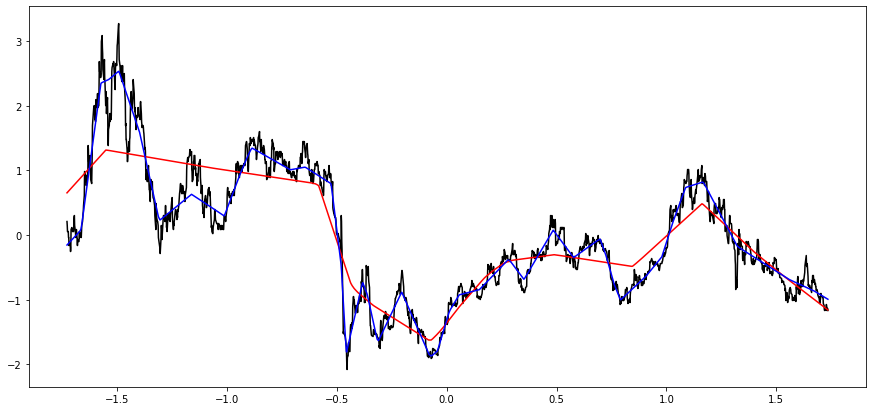

In [10]:
predictPrice = predictModel.predict(dates)
# predictPrice2 = predictModel2.predict(dates)
predictPrice3 = predictModel3.predict(dates)

plt.figure(figsize=(15,7))
plt.plot(dates, highestDailyPrice, c='black')
plt.plot(dates, predictPrice, c='red')
# plt.plot(dates, predictPrice2, c='blue')
plt.plot(dates, predictPrice3, c='blue')
plt.show()